In [ ]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy as np
from tempfile import TemporaryFile
import os
import pickle
import random
import operator
import math
import numpy as np
import librosa
import pandas as pd

In [ ]:
pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=1cf0ec66f7bbbc813ccf486a7b0920f1ea761e0b39cb82733e5f4aa666288abb
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [ ]:
!pip install python_speech_features

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Necessary libraries**

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os, time, warnings
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

warnings.filterwarnings("ignore")
log_cols = ["model", "accuracy", "train_time", "pred_time"]
log = pd.DataFrame(columns=log_cols)

**Loading the audio dataset folder and specifying 13 MFCC Coefficients**

In [ ]:
directory = "/content/drive/MyDrive/audio/"
dataset = []
i=0
for folder in os.listdir(directory):
    i+=1
    if i==11 :
        break
    for file in os.listdir(directory+folder):
        (audio,rate) = librosa.load(directory+folder+"/"+file)
        mfcc_feat = librosa.feature.mfcc(y=audio,sr= rate, n_mfcc=13)
        mean_matrix = np.mean(mfcc_feat.T, axis=0)
        dataset.append([mean_matrix,i])


**Extraction of 13 MFCC Coefficients and Class Labels**

In [ ]:
features_df= pd.DataFrame(dataset, columns=['features', 'class'])
features_df

features  class
0   [-324.09125, 133.56267, -25.030157, 24.55361, ...      1
1   [-268.21857, 135.68166, -34.056377, 25.616009,...      1
2   [-235.30266, 141.11952, -34.68189, 30.97919, -...      1
3   [-264.33557, 138.1797, -30.096487, 37.83662, -...      1
4   [-326.89743, 127.400604, -30.596176, 37.471397...      1
5   [-259.95258, 118.92715, -35.608337, 31.969566,...      1
6   [-90.757164, 140.44087, -29.084547, 31.686693,...      2
7   [-177.80174, 118.20316, -17.57063, 30.760927, ...      2
8   [-160.35417, 126.20948, -35.581394, 22.139256,...      2
9   [-199.57513, 150.0861, 5.663404, 26.855282, 1....      2
10  [-113.59882, 121.57067, -19.162262, 42.36394, ...      2
11  [-207.52383, 123.98514, 8.947019, 35.86715, 2....      2
12  [-40.30154, 80.84724, -25.67689, 38.443054, -1...      3
13  [-140.16278, 71.62643, -3.788743, 38.988525, 4...      3
14  [-202.88803, 132.37215, 12.0172825, 43.746815,...      3
15  [-11.706974, 81.97666, -8.50863, 52.77378, -14...      3
16  [-81.23491, 49.593636, -14.54748, 57.964966, 6...      3
17  [-80.93423, 84.780525, -31.534628, 33.90174, -...      3
18  [-7.9727893, 62.724636, -1.45917, 28.109985, 9...      4
19  [-23.104954, 70.25588, 3.8055308, 28.323957, 1...      4
20  [-24.671667, 62.440266, -7.7540884, 28.432592,...      4
21  [-20.78135, 62.950428, 2.3044403, 30.773718, 6...      4
22  [-57.75979, 95.76648, -10.109319, 40.979637, 1...      4
23  [-120.305214, 79.22588, 5.2293863, 34.548218, ...      4

In [ ]:
df = features_df.sample(frac=1).reset_index(drop=True)
df.head()

features  class
0  [-120.305214, 79.22588, 5.2293863, 34.548218, ...      4
1  [-40.30154, 80.84724, -25.67689, 38.443054, -1...      3
2  [-177.80174, 118.20316, -17.57063, 30.760927, ...      2
3  [-24.671667, 62.440266, -7.7540884, 28.432592,...      4
4  [-90.757164, 140.44087, -29.084547, 31.686693,...      2

In [ ]:
X= np.array(df['features'].tolist())
y= np.array(df['class'].tolist())

**Output Shape**

In [ ]:
y= np.array(pd.get_dummies(y))
y.shape


(24, 4)

**Splitting Dataset to Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 , random_state=0)

**Training our Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
num_label=y.shape[1]
num_label

4

**ANN MODEL**

In [ ]:
num_labels = y.shape[1]
ANN_Model = Sequential()
ANN_Model.add(Dense(1000, activation="relu", input_shape=(13,)))
ANN_Model.add(Dense(750, activation="relu"))
ANN_Model.add(Dense(500, activation="relu"))
ANN_Model.add(Dense(250, activation="relu"))
ANN_Model.add(Dense(100, activation="relu"))
ANN_Model.add(Dense(50, activation="relu"))
ANN_Model.add(Dense(num_labels, activation="softmax"))
ANN_Model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1000)              14000     
                                                                 
 dense_22 (Dense)            (None, 750)               750750    
                                                                 
 dense_23 (Dense)            (None, 500)               375500    
                                                                 
 dense_24 (Dense)            (None, 250)               125250    
                                                                 
 dense_25 (Dense)            (None, 100)               25100     
                                                                 
 dense_26 (Dense)            (None, 50)                5050      
                                                                 
 dense_27 (Dense)            (None, 4)                

In [ ]:
ANN_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19, 13)
(19, 4)
(5, 13)
(5, 4)


In [ ]:
num_epochs = 100
num_batch_size = 32

t0 = time.time()

ANN_Results = ANN_Model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
)

ANN_Model.save("Model1.h5")
print("ANN Model Saved")
train_hist_m1 = pd.DataFrame(ANN_Results.history)
train_m1 = round(time.time() - t0, 3)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.6617 - accuracy: 0.1053 - val_loss: 2.5990 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 59ms/step - loss: 3.2239 - accuracy: 0.3158 - val_loss: 1.2889 - val_accuracy: 0.4000
Epoch 3/100
1/1 [==============================] - 0s 55ms/step - loss: 5.4374 - accuracy: 0.2105 - val_loss: 1.1099 - val_accuracy: 0.4000
Epoch 4/100
1/1 [==============================] - 0s 56ms/step - loss: 1.6775 - accuracy: 0.3684 - val_loss: 4.5008 - val_accuracy: 0.2000
Epoch 5/100
1/1 [==============================] - 0s 55ms/step - loss: 3.1876 - accuracy: 0.3684 - val_loss: 3.2353 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 77ms/step - loss: 2.4809 - accuracy: 0.3684 - val_loss: 0.9466 - val_accuracy: 0.4000
Epoch 7/100
1/1 [==============================] - 0s 72ms/step - loss: 1.6362 - accuracy: 0.3158 - val_loss: 0.7195 - val_accuracy: 0.6000
Epoch 8/100
1/

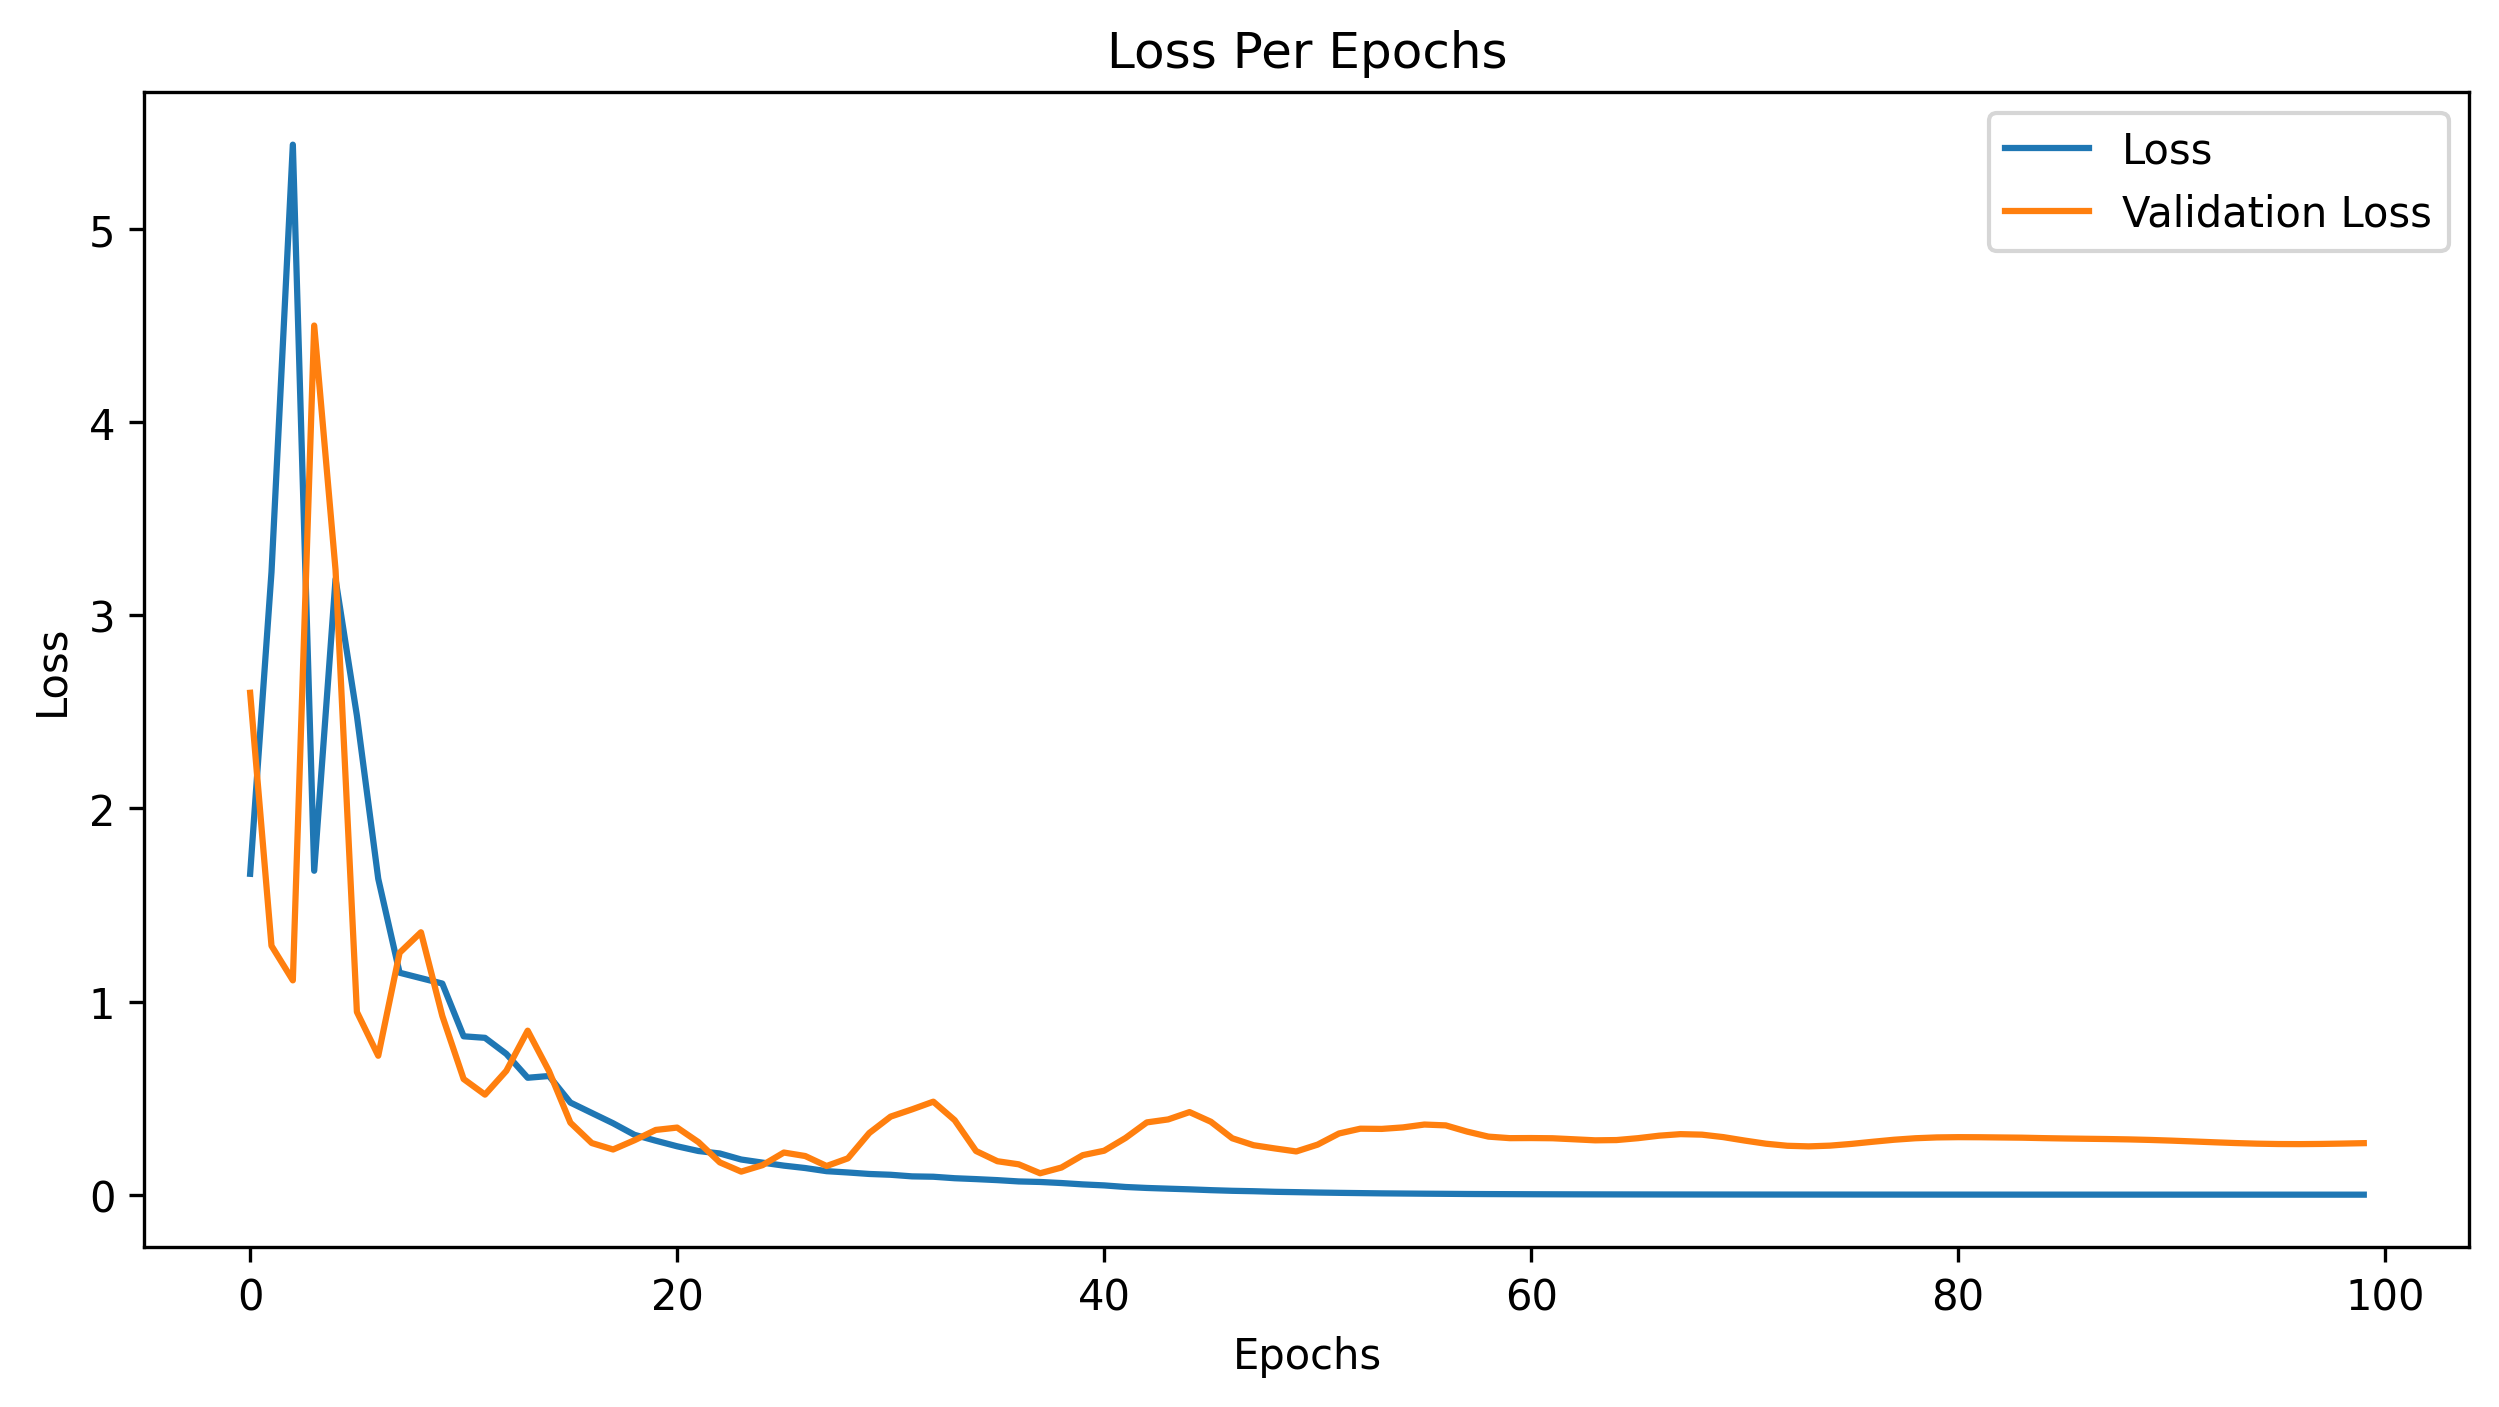

In [ ]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m1[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

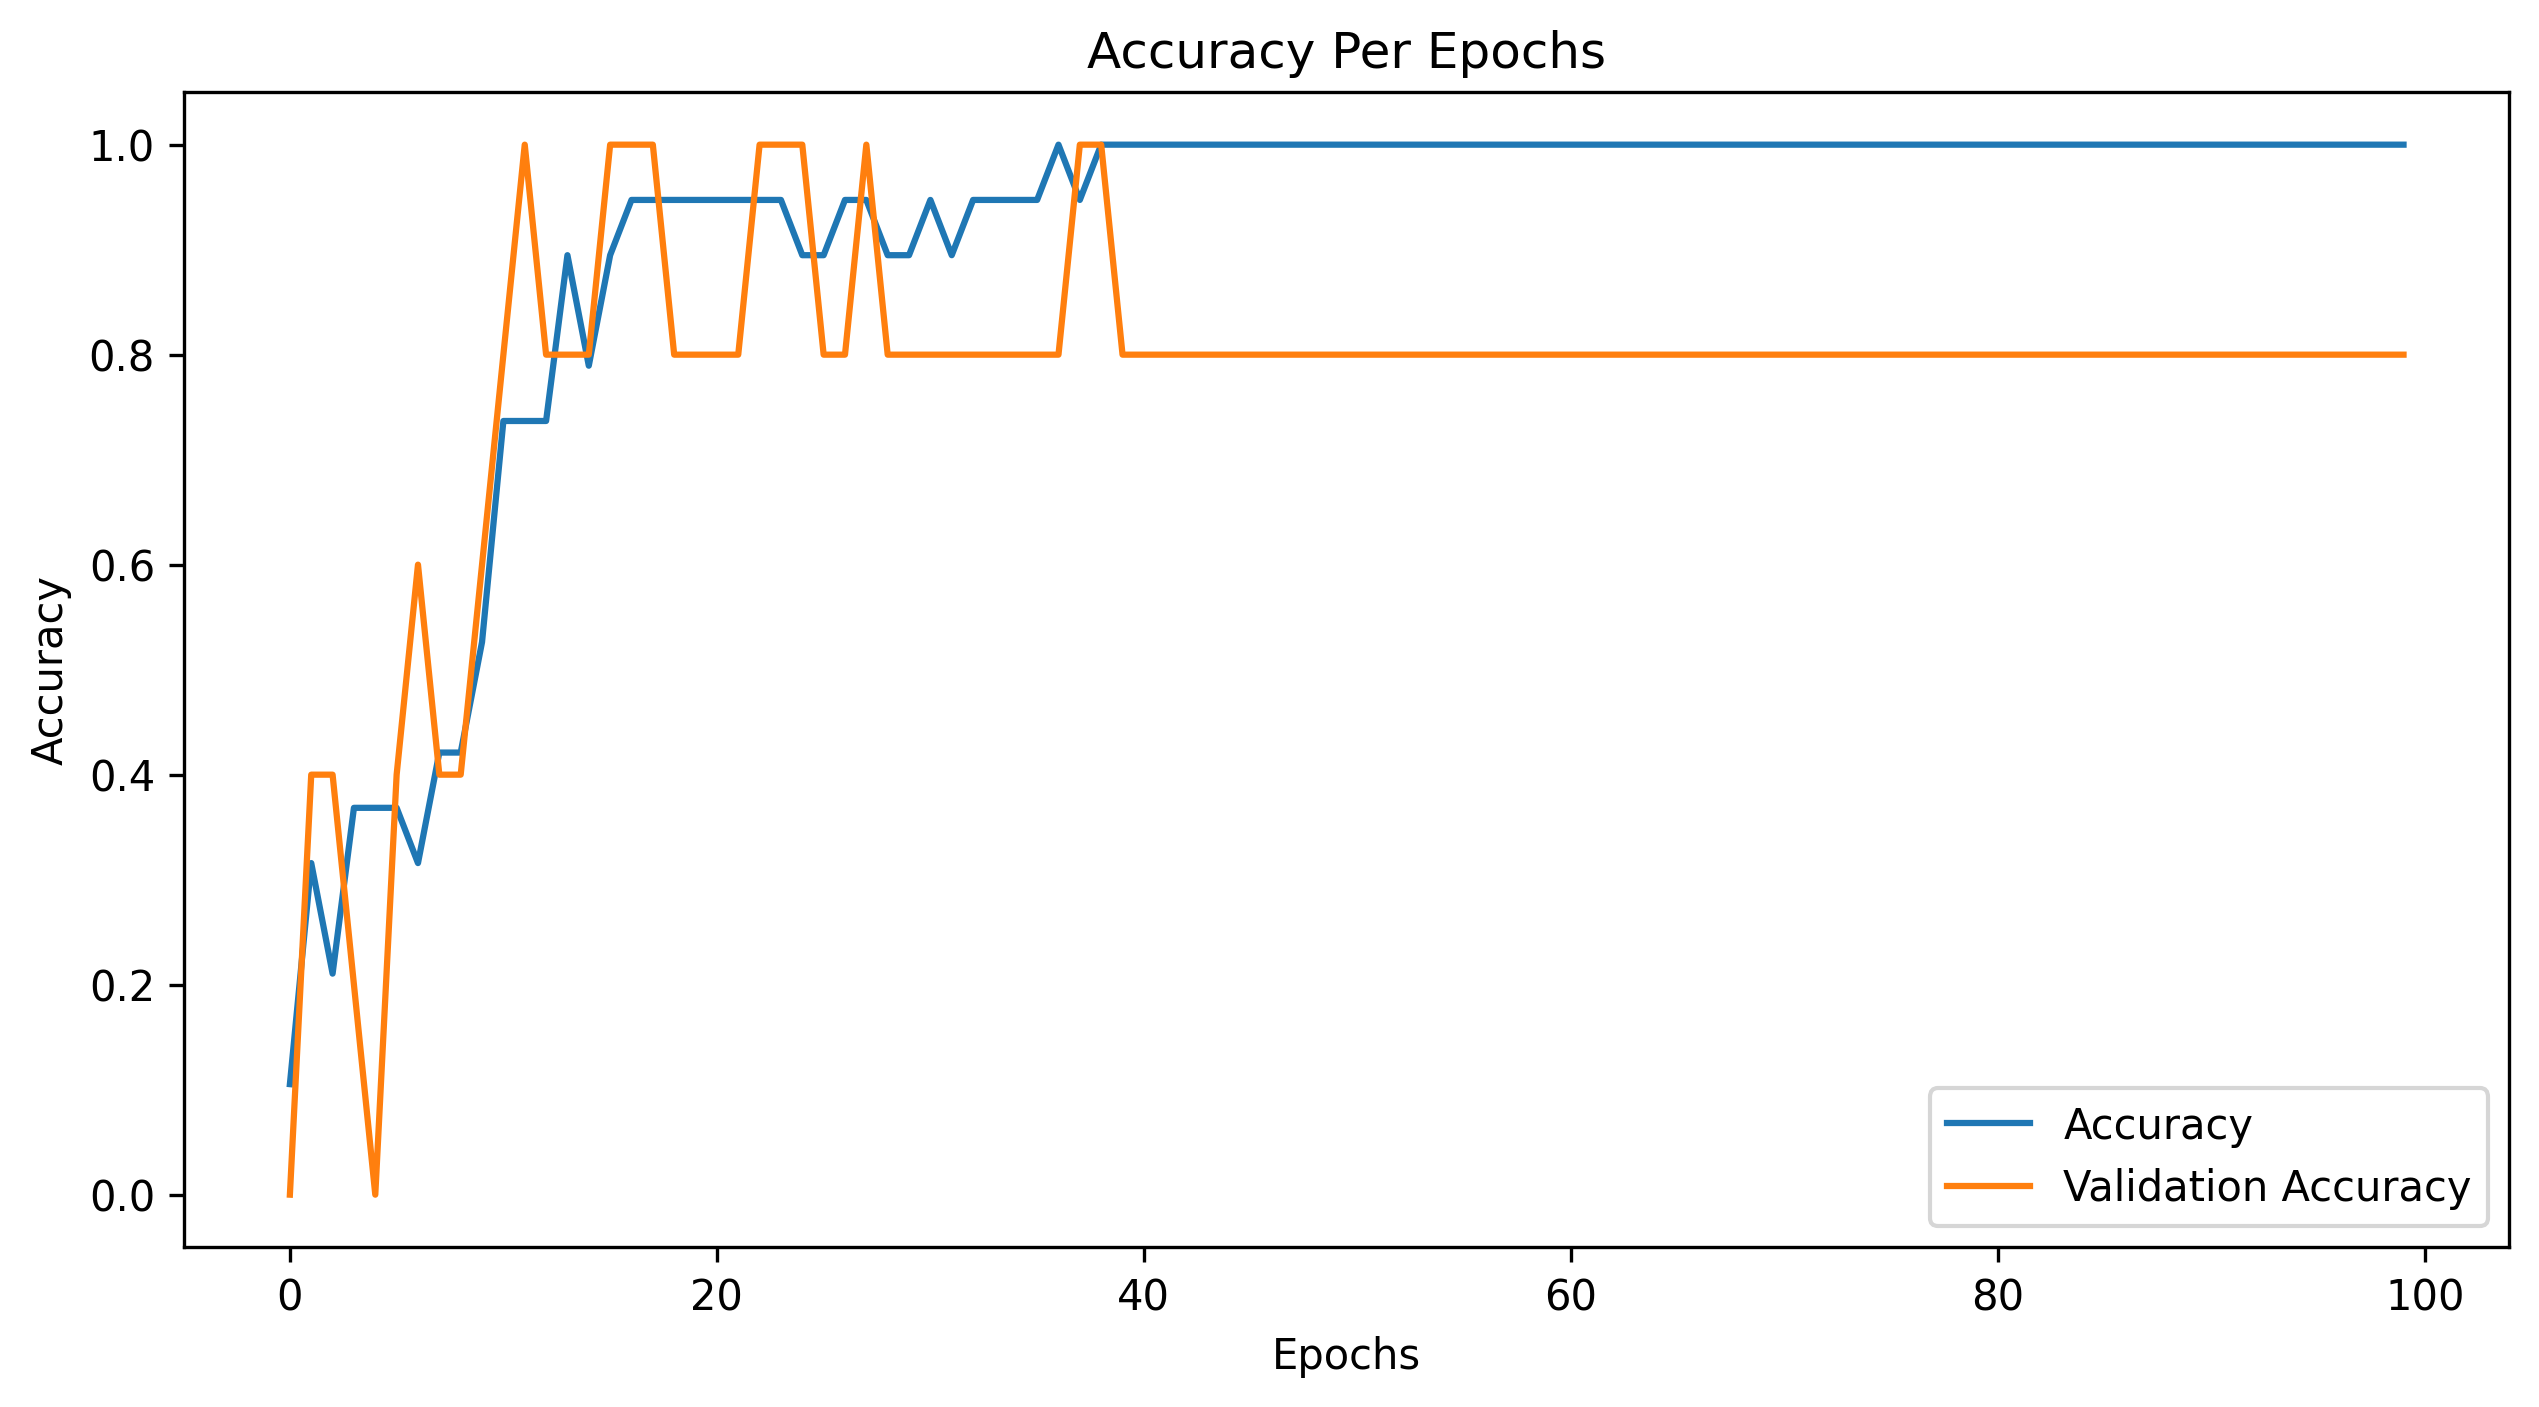

In [ ]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m1[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
acc_m1 = ANN_Model.evaluate(X_test, y_test, verbose=0)
t0 = time.time()
y_pred_m1 = ANN_Model.predict(X_test, verbose=0)
pred_m1 = round(time.time() - t0, 3)
log_entry = pd.DataFrame(
    [["ANN", acc_m1[1] * 100, train_m1, pred_m1]], columns=log_cols
)
log = pd.concat([log, log_entry], ignore_index=True)

**PREDICTION FUNCTION**

In [ ]:
def ANN_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(ANN_Model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    #predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("ANN has predicted the class as  --> ", predicted_vector[0])





**Prediction Examples**

In [ ]:
# File name
file_name = "/content/drive/MyDrive/audio/traffic/traffic.00003.wav"
ANN_Prediction(file_name)
ipd.Audio(file_name)

1/1 [==============================] - 0s 31ms/step
ANN has predicted the class as  -->  1


In [ ]:
file_name = "/content/drive/MyDrive/audio/talking/talking.00001.wav"
ANN_Prediction(file_name)
ipd.Audio(file_name)

1/1 [==============================] - 0s 38ms/step
ANN has predicted the class as  -->  2


In [ ]:
test_accuracy=  ANN_Model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy[1])

0.800000011920929


In [ ]:
test_accuracy=  ANN_Model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy[1])

0.800000011920929


**CNN**

In [ ]:
CNN_model= Sequential()

CNN_model.add(Dense(100, input_shape=(13,)))
CNN_model.add(Activation('relu'))
CNN_model.add(Dropout(0.5))


CNN_model.add(Dense(200))
CNN_model.add(Activation('relu'))
CNN_model.add(Dropout(0.5))

CNN_model.add(Dense(100))
CNN_model.add(Activation('relu'))
CNN_model.add(Dropout(0.5))


CNN_model.add(Dense(4))
CNN_model.add(Activation('softmax'))

In [ ]:
CNN_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 100)               1400      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_29 (Dense)            (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_30 (Dense)            (None, 100)              

In [ ]:
CNN_model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [ ]:
X_train.shape

(19, 13)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime


num_epochs = 100
num_batch_size = 32
#checkpointer = ModelCheckpoint(filepath='save_models\audio_classification.hdf5', verbose=1 , save_best_only=True)
start= datetime.now()
CNN_model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test) )

duration= datetime.now()-start
print("Training completed in time: ", duration)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 41.4115 - accuracy: 0.2632 - val_loss: 10.1522 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 56ms/step - loss: 41.3111 - accuracy: 0.1579 - val_loss: 6.3535 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 56ms/step - loss: 33.3751 - accuracy: 0.1053 - val_loss: 3.3123 - val_accuracy: 0.2000
Epoch 4/100
1/1 [==============================] - 0s 59ms/step - loss: 20.3831 - accuracy: 0.3158 - val_loss: 2.7715 - val_accuracy: 0.4000
Epoch 5/100
1/1 [==============================] - 0s 40ms/step - loss: 26.1745 - accuracy: 0.2105 - val_loss: 2.6751 - val_accuracy: 0.4000
Epoch 6/100
1/1 [==============================] - 0s 40ms/step - loss: 13.8274 - accuracy: 0.3684 - val_loss: 2.6765 - val_accuracy: 0.4000
Epoch 7/100
1/1 [==============================] - 0s 54ms/step - loss: 23.5686 - accuracy: 0.1579 - val_loss: 2.6157 - val_accuracy: 0.4000
Epoch 

In [ ]:
test_accuracy=  CNN_model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy[1])

1.0


In [ ]:
plt.rcParams["figure.figsize"] = (17, 2)
plt.rcParams["figure.dpi"] = 550

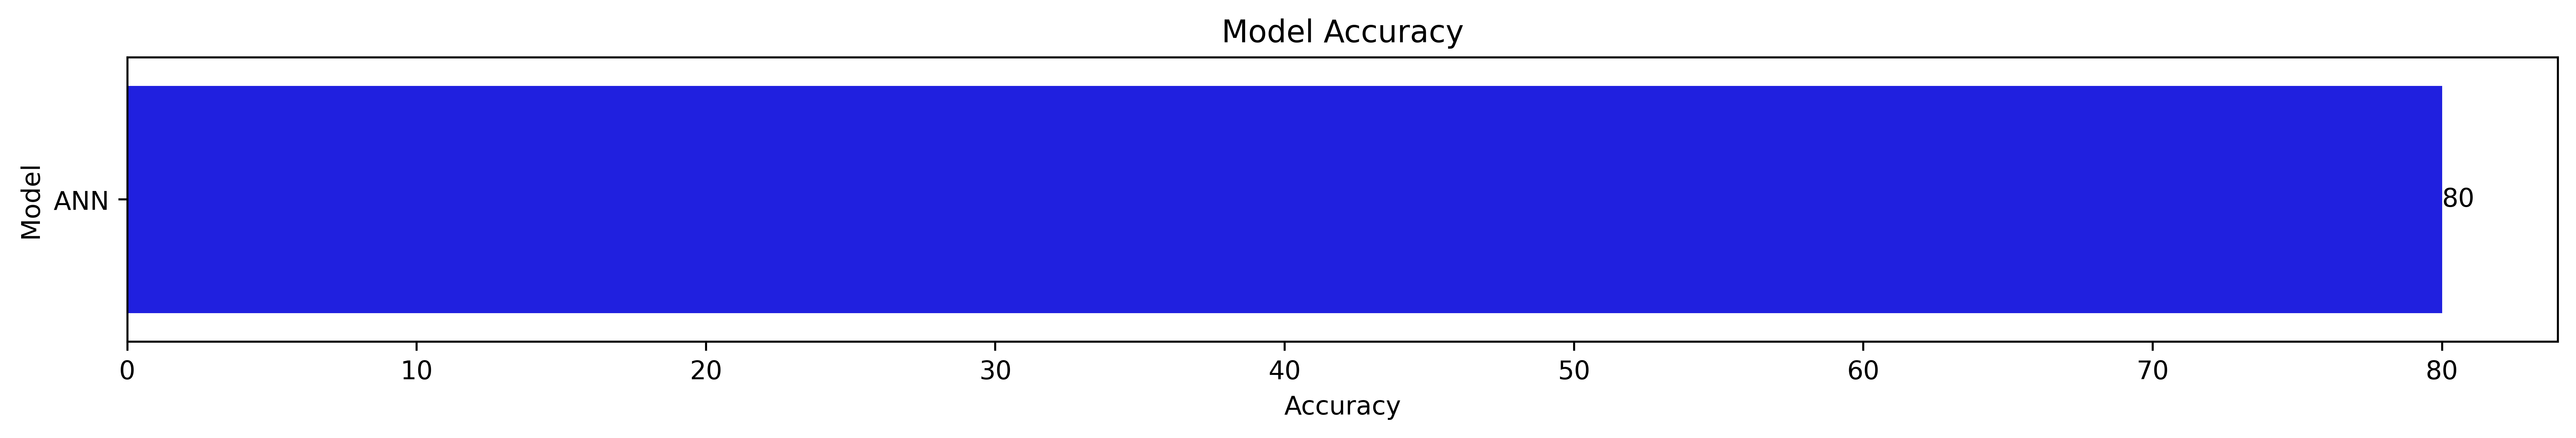

In [ ]:
ax = sns.barplot(x="accuracy", y="model", data=log, color="b")
ax.bar_label(ax.containers[0])
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Accuracy")
plt.show()

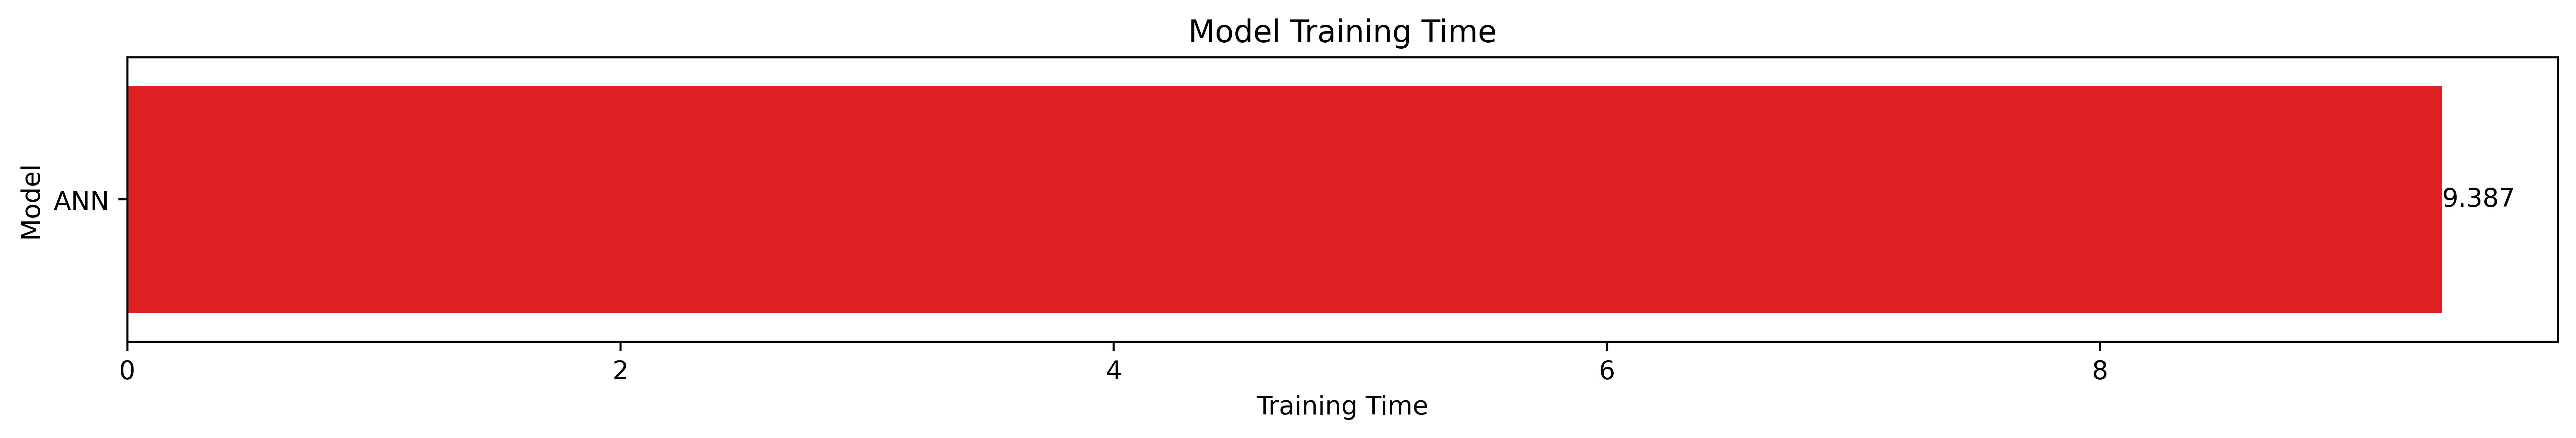

In [ ]:
ax = sns.barplot(x="train_time", y="model", data=log, color="r")
ax.bar_label(ax.containers[0])
plt.xlabel("Training Time")
plt.ylabel("Model")
plt.title("Model Training Time")
plt.show()

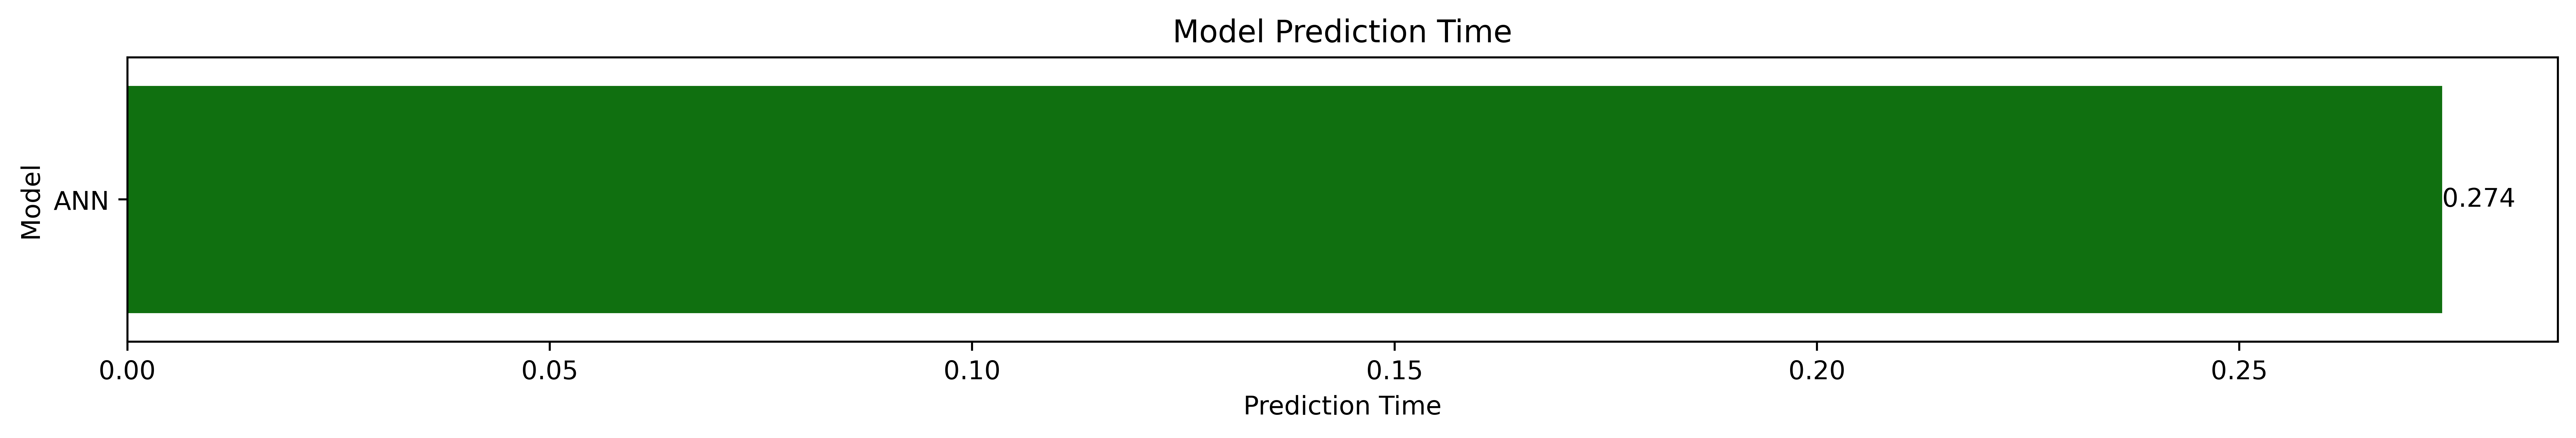

In [ ]:
ax = sns.barplot(x="pred_time", y="model", data=log, color="g")
ax.bar_label(ax.containers[0])
plt.xlabel("Prediction Time")
plt.ylabel("Model")
plt.title("Model Prediction Time")
plt.show()

In [ ]:
xTrainval, xTest, yTrainval, yTest = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=387
)
xTrain, xvalid, yTrain, yvalid = train_test_split(
    xTrainval, yTrainval, test_size=0.2, stratify=yTrainval, random_state=387
)
print("\nNumber of samples for Train set :", xTrain.shape[0])
print("Number of samples for Validation set :", xvalid.shape[0])
print("Number of samples for Test set :", xTest.shape[0])

xTrain = np.expand_dims(xTrain, axis=1)
xvalid = np.expand_dims(xvalid, axis=1)

print("Shape of X Train", xTrain.shape)
print("Shape of X Test", xTest.shape)

ValueError: The test_size = 3 should be greater or equal to the number of classes = 4